In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dados = pd.read_csv("Dados\iris.csv")
dados

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dados.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
dados.shape

(150, 5)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dados.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dados.columns = ["comprimento séptico", "largura sépala", "comprimento pétala","largura pétala", "Classe"]
dados.head(10)

,comprimento séptico,largura sépala,comprimento pétala,largura pétala,Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Analise de dados - Iris**

In [8]:
dados.corr()

,comprimento séptico,largura sépala,comprimento pétala,largura pétala
comprimento séptico,1.000000,-0.109369,0.871754,0.817954
largura sépala,-0.109369,1.000000,-0.420516,-0.356544
comprimento pétala,0.871754,-0.420516,1.000000,0.962757
largura pétala,0.817954,-0.356544,0.962757,1.000000


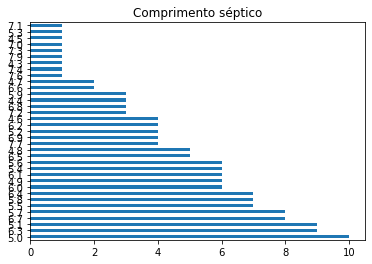

In [9]:
dados["comprimento séptico"].value_counts().plot.barh(title="Comprimento séptico")

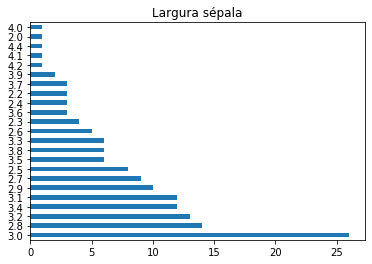

In [10]:
dados["largura sépala"].value_counts().plot.barh(title="Largura sépala")

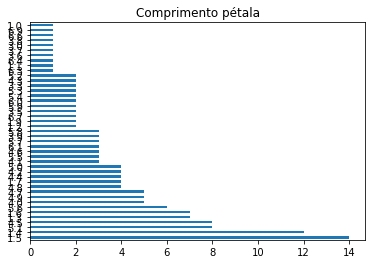

In [11]:
dados["comprimento pétala"].value_counts().plot.barh(title="Comprimento pétala")

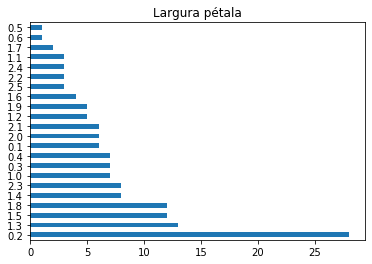

In [12]:
dados["largura pétala"].value_counts().plot.barh(title="Largura pétala")

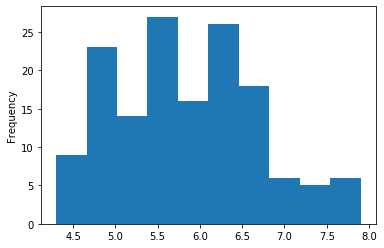

In [13]:
dados["comprimento séptico"].plot.hist()

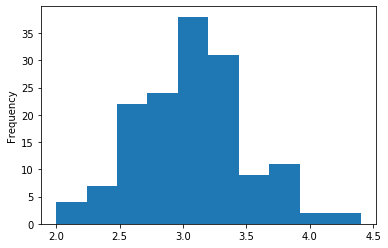

In [14]:
dados["largura sépala"].plot.hist()

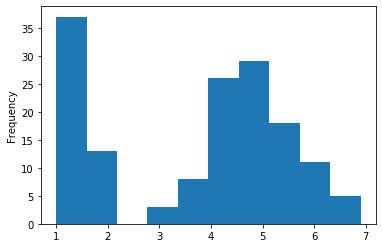

In [15]:
dados["comprimento pétala"].plot.hist()

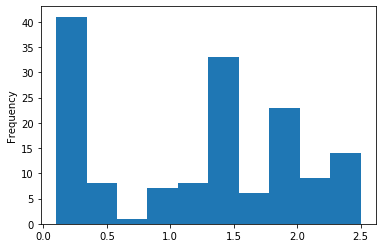

In [16]:
dados["largura pétala"].plot.hist()

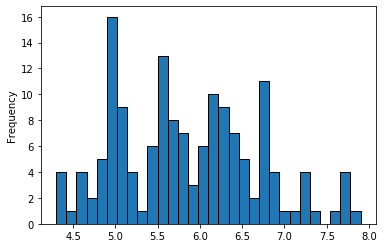

In [17]:
dados["comprimento séptico"].plot.hist(bins=30, edgecolor="black")

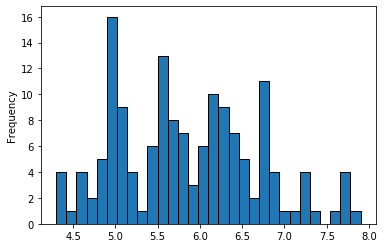

In [18]:
dados["comprimento séptico"].plot.hist(bins=30, edgecolor="black")

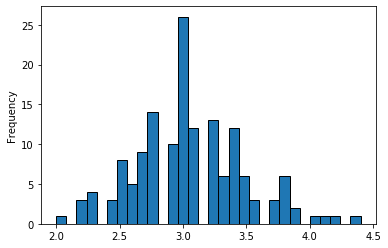

In [19]:
dados["largura sépala"].plot.hist(bins=30, edgecolor="black")

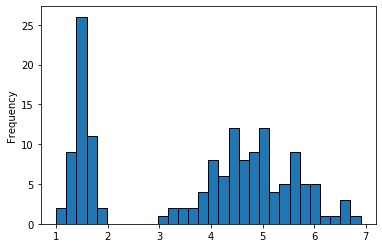

In [20]:
dados["comprimento pétala"].plot.hist(bins=30, edgecolor="black")

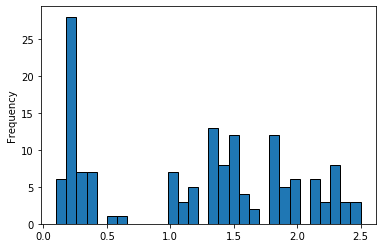

In [21]:
dados["largura pétala"].plot.hist(bins=30, edgecolor="black")

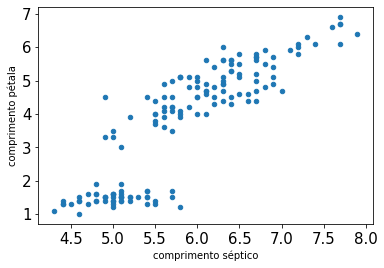

In [22]:
dados.plot.scatter(x= 'comprimento séptico', y= 'comprimento pétala', fontsize = 15)

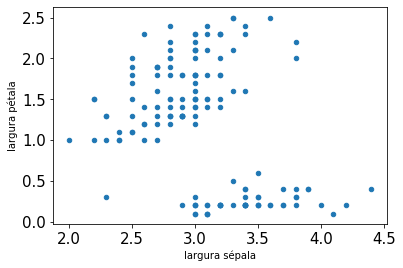

In [23]:
dados.plot.scatter(x= 'largura sépala', y= 'largura pétala', fontsize = 15)

**Algoritmo Naive bayes com Iris**

In [24]:
previsores = dados.iloc[:, 1:4].values
classe = dados.iloc[:,4].values

In [25]:
previsores

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.1, 1.5, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [26]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [27]:
previsores

array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.44444970e+00],
       [-1.24957601e-01, -1.51186952e+00, -1.44444970e+00],
       [ 2.18907205e+00, -1.45500381e+00, -1.31297673e+00],
       [ 3.11468391e+00, -1.28440670e+00, -1.05003079e+00],
       [ 1.95766909e+00, -1.39813811e+00

In [28]:
#Treino e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

**Naive bayes**

In [32]:
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)
classificador

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
previsores_teste

array([[-5.87763531e-01,  7.62758643e-01,  1.57942861e+00],
       [-1.97618132e+00,  1.37235899e-01, -2.61192967e-01],
       [ 2.65187798e+00, -1.34127240e+00, -1.31297673e+00],
       [-3.56360566e-01,  1.44514709e+00,  7.90590793e-01],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00],
       [ 5.69251294e-01,  1.27454998e+00,  1.71090158e+00],
       [ 1.03205722e+00, -1.39813811e+00, -1.18150376e+00],
       [ 1.06445364e-01,  5.35295827e-01,  3.96171883e-01],
       [-5.87763531e-01,  5.92161531e-01,  2.64698913e-01],
       [-5.87763531e-01,  1.37235899e-01,  1.33225943e-01],
       [-1.05056946e+00,  1.04708716e+00,  2.64698913e-01],
       [ 3.37848329e-01,  4.21564419e-01,  3.96171883e-01],
       [-5.87763531e-01,  5.35295827e-01,  1.75297293e-03],
       [-5.87763531e-01,  4.78430123e-01,  3.96171883e-01],
       [-3.56360566e-01,  5.35295827e-01,  2.64698913e-01],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00],
       [-3.56360566e-01,  4.21564419e-01

**Modelo de Machine learning**

In [34]:
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

print("Taxa de acerto: %.2f" % (precisao * 100))

Taxa de acerto: 100.00


In [35]:
print("Matriz de confusão:")
matriz

Matriz de confusão:


array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]], dtype=int64)